# visualizing dummy data

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x=np.array([1,2,3,4,5]).reshape(-1, 1)
y=np.array([3,6,13,28,55])

# linear regression

In [28]:
linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred_linear = linear_model.predict(x)

# polynomial regression(degree2)

In [29]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# plot

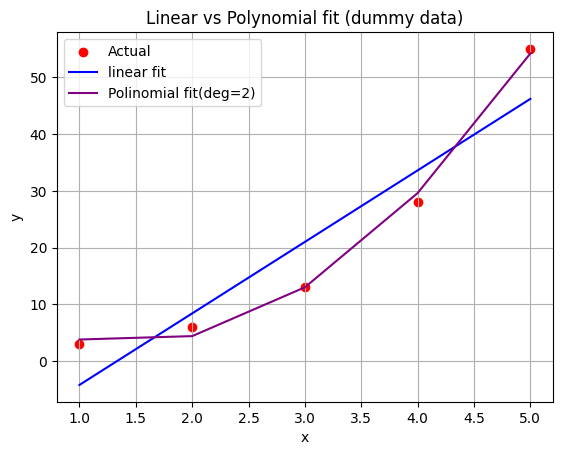

In [30]:
plt.scatter(x,y, color='red', label='Actual')
plt.plot(x,y_pred_linear, label='linear fit', color='blue')
plt.plot(x,y_pred_poly, label='Polinomial fit(deg=2)', color='purple')
plt.title("Linear vs Polynomial fit (dummy data)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# real dataset: salary prediction

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load dataset

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [33]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


# train-test split

In [34]:
X= df[["Years of Experience"]]
y=df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)


# linear regression

# train linear regression

In [35]:
lin_model= LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# MATRICS

In [36]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin= np.sqrt(mse_lin)
r2_lin= r2_score(y_test, y_pred_lin)

print("linear Regression")
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)
print("R2 score:", r2_lin)

linear Regression
MSE: 946833177.7094355
RMSE: 30770.654489455297
R2 score: 0.6669549610495003



# polynomial regression(degree 2 and 4)

**degree** **2**

In [37]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

poly2_model = LinearRegression()
poly2_model.fit(X_train_poly2, y_train)
y_pred_poly2 = poly2_model.predict(X_test_poly2)

In [18]:
X_train_poly2

array([[  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.]])

X_test_poly2

# matrics

In [38]:
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

# degree 4

In [39]:
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)

poly4_model = LinearRegression()
poly4_model.fit(X_train_poly4, y_train)
y_pred_poly4 = poly4_model.predict(X_test_poly4)

In [40]:
X_train_poly4

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       ...,
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [41]:
X_test_poly4

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       ...,
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

# matrics

In [42]:
mse_poly4 =mean_squared_error(y_test, y_pred_poly4)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_test, y_pred_poly4)

print("\nPolynomial Regression (Degree 2):")
print("MSE:",mse_poly2)
print("RMSE:", rmse_poly2)
print("R2 score:", r2_poly2)

print("\nPolynomial Regression (Degree 4):")
print("MSE:",mse_poly4)
print("RMSE:", rmse_poly4)
print("R2 score:", r2_poly4)


Polynomial Regression (Degree 2):
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 score: 0.7443306732971963

Polynomial Regression (Degree 4):
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 score: 0.7467308484568018


# visualization of all models

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


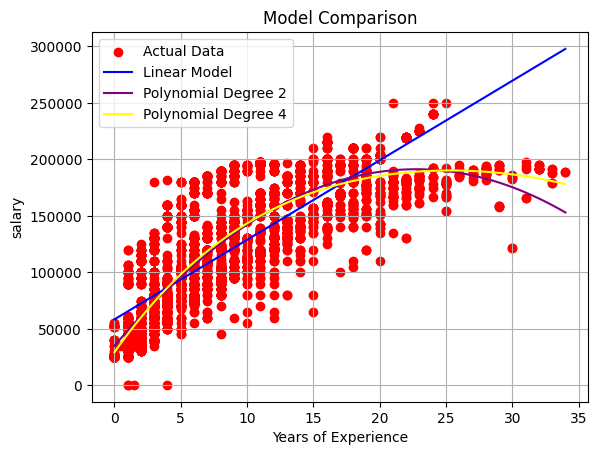

In [49]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

#transform using polynomial features
X_range_poly2 = poly2.transform(X_range)
X_range_poly4 = poly4.transform(X_range)

#predict using models
y_range_lin = lin_model.predict(X_range)
y_range_poly2 = poly2_model.predict(X_range_poly2)
y_range_poly4 = poly4_model.predict(X_range_poly4)

#plot
plt.scatter(X,y, color='red',label='Actual Data')
plt.plot(X_range, y_range_lin, label='Linear Model',color='blue')
plt.plot(X_range,y_range_poly2, label='Polynomial Degree 2',color='purple')
plt.plot(X_range,y_range_poly4, label='Polynomial Degree 4',color='yellow')
plt.xlabel("Years of Experience")
plt.ylabel("salary")
plt.title("Model Comparison")
plt.legend()
plt.grid(True)
plt.show()

# model performance comparison

In [25]:
metrics_df=pd.DataFrame({
    "Model":["Linear Regression","Polynomial(Degree 2)","Polynomial(Degree 4)"],
    "MSE":[mse_lin,mse_poly2,mse_poly4],
    "RMSE":[rmse_lin,rmse_poly2,rmse_poly4],
    "R2_Score":[r2_lin,r2_poly2,r2_poly4]
})

metrics_df.style.format({
    "MSE":"{:.2f}",
    "RMSE":"{:.2f}",
    "R2 Score":"{:.4f}"
})

,Model,MSE,RMSE,R2_Score
0,Linear Regression,946833177.71,30770.65,0.666955
1,Polynomial(Degree 2),726857249.72,26960.29,0.744331
2,Polynomial(Degree 4),720033651.69,26833.44,0.746731
